# Polynomial Regression for Classification

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv,matrix_rank,det
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder

X = np.array([[-1], [0], [0.5], [0.3], [0.8]])
y = np.array([[1], [1], [2], [3], [2]])
Xt = np.array([[-0.1], [0.4]])

# Generate 1st order polynomial features
Poly = PolynomialFeatures(1)
P = Poly.fit_transform(X)
Pt = Poly.fit_transform(Xt)
print("Polynomial features:")
print(P)

# One-hot encoding
# class1: y=[1,0,0]; class2: y=[0,1,0]; class3: y=[0,0,1]
onehot_encoder=OneHotEncoder(sparse_output=False)
#(sparse_output=False) means that the encoded output will be returned as a dense NumPy array
#(sparse_output=True): The output is a sparse matrix storing only non-zero entries.
Y = onehot_encoder.fit_transform(y)
print("One-hot encoded Y:")
print(Y)

Polynomial features:
[[ 1.  -1. ]
 [ 1.   0. ]
 [ 1.   0.5]
 [ 1.   0.3]
 [ 1.   0.8]]
One-hot encoded Y:
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [60]:
# check inverse
P_sqr = P.T @ P
rank = matrix_rank(P_sqr)
print("P.T @ P is : "+ str(P_sqr))
print("P.T @ P rank is : "+ str(rank))
print("P.T @ P dimension is : "+ str(P_sqr.shape))

P.T @ P is : [[5.   0.6 ]
 [0.6  1.98]]
P.T @ P rank is : 2
P.T @ P dimension is : (2, 2)


In [61]:
# working out weight
W = inv(P.T @ P) @ P.T @ Y
print("W: " + str(W))

# prediction
Y_pred = Pt @ W
print("Y_pred: " + str(Y_pred))
y_pred_classes = np.argmax(Y_pred, axis=1)#returns the index of the maximum value along each row (axis=1: row-wise)
print("y_pred_classes: " + str(y_pred_classes))

W: [[ 0.47798742  0.33333333  0.18867925]
 [-0.64989518  0.55555556  0.09433962]]
Y_pred: [[0.54297694 0.27777778 0.17924528]
 [0.21802935 0.55555556 0.22641509]]
y_pred_classes: [0 1]


# Binomial Logistic Regression ###

In [ ]:

def logistic_cost_gradient(X, w, y, eps=1e-15):
    # Compute prediction, cost and gradient based on mean binary cross-entropy loss.

    pred_y = 1/(1+np.exp(-X @ w))

    # Clip predictions to prevent log(0) and log(1)
    # Due to floating-point precision (finite machine representation), 
    # when numbers are very small, they can be rounded down to 0.0. 
    # Similarly, very large exponentials can push probabilities to exactly 1.0.
    pred_y = np.clip(pred_y, eps, 1 - eps)
    cost   = np.sum(- (y * np.log(pred_y) + (1 - y) * np.log(1 - pred_y)))/X.shape[0]
    gradient = (X.T @ (pred_y-y))/X.shape[0]

    return pred_y, cost, gradient

In [63]:
# step 0: prepare data
X = np.array([[-1],[0],[0.5],[0.3],[0.8]])
poly = PolynomialFeatures(1)
P = poly.fit_transform(X)
y = np.array([1,1,0,1,0])

In [64]:
# step 1: learning

learning_rate = 0.1
w = np.array([0.1,-1])

pred_y, cost, gradient = logistic_cost_gradient(P, w, y)
print('Initial Cost =', cost)
print('Initial Gradient =', gradient)
print('Initial Weights =', w)

num_iters = 10000
cost_vec = np.zeros(num_iters+1) # Creates a 1D NumPy array filled with zeros
cost_vec[0] = cost

for i in range(1, num_iters+1):

    # update w
    w = w - learning_rate*gradient

    # compute updated cost and new gradient
    pred_y, cost, gradient = logistic_cost_gradient(P, w, y)
    cost_vec[i] = cost

    if(i % 1000 == 0):
        print('Iter', i, ': cost =', cost)
    if(i<3):
        print('Iter', i, ': cost =', cost)
        print('Gradient =', gradient)
        print('Weights =', w)

print('Final Cost =', cost)
print('Final Weights =', w)

Initial Cost = 0.5292144311712008
Initial Gradient = [-0.10829403  0.11017913]
Initial Weights = [ 0.1 -1. ]
Iter 1 : cost = 0.5268417340967371
Gradient = [-0.10622206  0.10967609]
Weights = [ 0.1108294  -1.01101791]
Iter 2 : cost = 0.5245239977372103
Gradient = [-0.10420428  0.10917858]
Weights = [ 0.12145161 -1.02198552]
Iter 1000 : cost = 0.22365059218728228
Iter 2000 : cost = 0.17180894506581426
Iter 3000 : cost = 0.14529929881332854
Iter 4000 : cost = 0.12799407963483428
Iter 5000 : cost = 0.11529362015014603
Iter 6000 : cost = 0.10533100945356369
Iter 7000 : cost = 0.09718157987049124
Iter 8000 : cost = 0.0903235791141367
Iter 9000 : cost = 0.0844340894241073
Iter 10000 : cost = 0.07929901120260331
Final Cost = 0.07929901120260331
Final Weights = [  6.07856181 -15.30514984]


Text(0.5, 1.0, 'Learning rate = 0.1')

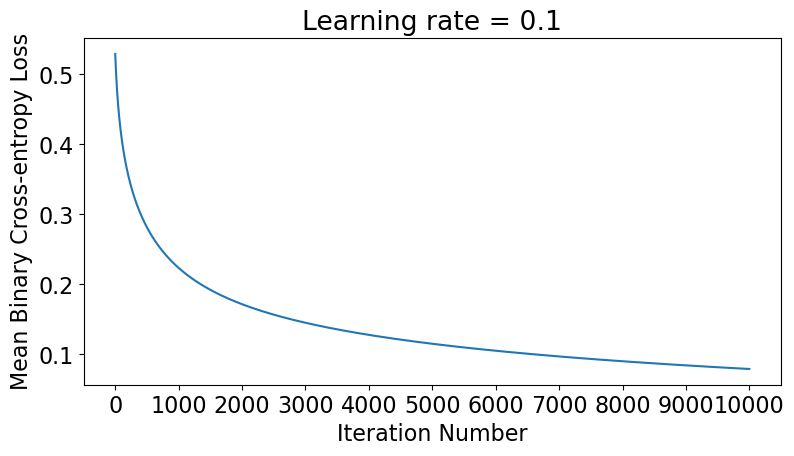

In [65]:
# Plot cost function values over iterations
plt.figure(0, figsize=[9,4.5])
plt.rcParams.update({'font.size': 16})
plt.plot(np.arange(0, num_iters+1, 1), cost_vec)
plt.xlabel('Iteration Number')
plt.ylabel('Mean Binary Cross-entropy Loss')
plt.xticks(np.arange(0, num_iters+1, 1000)) #Sets the x-axis tick locations in the current plot to those values to prevent being cluttered.
plt.title('Learning rate = ' + str(learning_rate))

In [66]:
#step 2: prediction
x_test = np.array([1,-0.1])
z = x_test @ w
y_test = 1/(1+np.exp(-z))
print("z: " + str(z))
print("y_test: " + str(y_test))

z: 7.609076791032635
y_test: 0.999504316330397


Decision Boundary: x1=0.3971579416308606


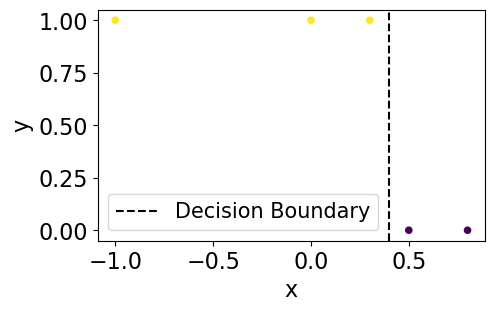

In [67]:
# Plot Decision Boundary
DB = -w[0]/w[1]
plt.figure(1, figsize=[5,3])
plt.rcParams.update({'font.size': 16})
plt.scatter(X, y, s=20, marker='o', c=y)
plt.axvline(x=DB, color='black', linestyle='--', label='Decision Boundary')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left',ncol=3, fontsize=15)
print("Decision Boundary: x1=" + str(DB))

# Multinomial Logistic Regression ###

In [68]:
def multi_logistic_cost_gradient(X, W, Y, eps=1e-15):

    # Compute prediction, cost and gradient based on cross entropy
    z = X @ W
    z_max = np.max(z, axis=1, keepdims=True)  # return maximum value per row (axis=1: row-wise); 
                                              # keepdims=True: keep the dimension (2D) for later broadcasting
    exp_z = np.exp(z - z_max) # prevent overflow
    pred_Y = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # Clip predictions to prevent log(0)
    pred_Y = np.clip(pred_Y, eps, 1 - eps)

    cost   = np.sum(-(Y * np.log(pred_Y)))/X.shape[0]
    gradient = X.T @ (pred_Y-Y) / X.shape[0]

    return pred_Y, cost, gradient

In [69]:
# Step 0: prepare data

X = np.array([[-1],[0],[0.5],[0.3],[0.8]])
poly = PolynomialFeatures(1)
P = poly.fit_transform(X)
print("P: " + str(P))
# class1: y=[1,0,0]; class2: y=[0,1,0]; class3: y=[0,0,1]
y_raw = np.array([[1], [1], [2], [3], [2]])
onehot_encoder=OneHotEncoder(sparse_output=False)
Y = onehot_encoder.fit_transform(y_raw)
print("Y: " + str(Y))

P: [[ 1.  -1. ]
 [ 1.   0. ]
 [ 1.   0.5]
 [ 1.   0.3]
 [ 1.   0.8]]
Y: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [70]:
# Step 1: learning

learning_rate = 0.5
W= np.array([[0.5, 0.3, 0.2], [-1, 0.5, 0.1]])

pred_Y, cost, gradient = multi_logistic_cost_gradient(P, W, Y, eps=1e-15)
print('Initial Cost =', cost)
print('Initial Gradient =', gradient)
print('Initial Weights =', W)

num_iters = 10000
cost_vec = np.zeros(num_iters+1)
cost_vec[0] = cost

for i in range(1, num_iters+1):

    # update w
    W = W - learning_rate*gradient

    # compute updated cost and new gradient
    pred_Y, cost, gradient = multi_logistic_cost_gradient(P, W, Y, eps=1e-15)
    cost_vec[i] = cost

    if(i % 1000 == 0):
        print('Iter', i, ': cost =', cost)
    if(i<3):
        print('Iter', i, ': cost =', cost)
        print('Gradient =', gradient)
        print('Weights =', W)

print('Final Cost =', cost)
print('Final Weights =', W)

Initial Cost = 0.8022881819072072
Initial Gradient = [[-0.03546935 -0.04792369  0.08339304]
 [ 0.13213239 -0.1401589   0.00802651]]
Initial Weights = [[ 0.5  0.3  0.2]
 [-1.   0.5  0.1]]
Iter 1 : cost = 0.7795683594693033
Gradient = [[-0.03270099 -0.03511072  0.06781171]
 [ 0.12473711 -0.12981954  0.00508243]]
Weights = [[ 0.51773468  0.32396185  0.15830348]
 [-1.0660662   0.57007945  0.09598675]]
Iter 2 : cost = 0.7607300780934951
Gradient = [[-0.03049513 -0.02461642  0.05511155]
 [ 0.11804638 -0.12085116  0.00280477]]
Weights = [[ 0.53408517  0.3415172   0.12439763]
 [-1.12843475  0.63498922  0.09344553]]
Iter 1000 : cost = 0.19604646547387247
Iter 2000 : cost = 0.1292127218114872
Iter 3000 : cost = 0.0958472330261742
Iter 4000 : cost = 0.07568248180854416
Iter 5000 : cost = 0.06225271831640409
Iter 6000 : cost = 0.05271896343741894
Iter 7000 : cost = 0.045629554089268366
Iter 8000 : cost = 0.040167222553487494
Iter 9000 : cost = 0.03583863738277689
Iter 10000 : cost = 0.032329480055

Text(0.5, 1.0, 'Learning rate = 0.5')

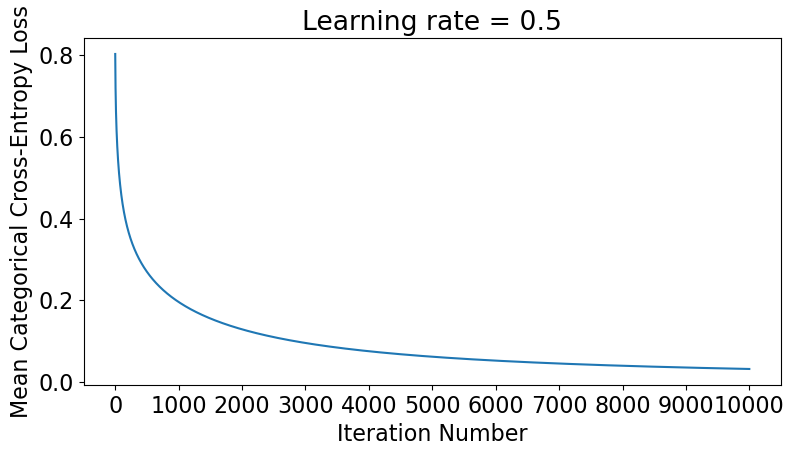

In [71]:
# Plot cost function values over iterations
plt.figure(0, figsize=[9,4.5])
plt.rcParams.update({'font.size': 16})
plt.plot(np.arange(0, num_iters+1, 1), cost_vec)
plt.xlabel('Iteration Number')
plt.ylabel('Mean Categorical Cross-Entropy Loss')
plt.xticks(np.arange(0, num_iters+1, 1000))
plt.title('Learning rate = ' + str(learning_rate))

In [72]:
# step 2: prediction
x_test = np.array([1,-0.1])
z = x_test @ W
Y_test = np.exp(z) / np.sum(np.exp(z), axis=-1, keepdims=True)
print("z: " + str(z))
print("Y_test: " + str(Y_test))


z: [  9.11427376 -11.28199278   3.20771902]
Y_test: [9.97285838e-01 1.38303649e-09 2.71416045e-03]
